In [335]:
from IPython.display import display, Markdown
from os import listdir
from os.path import isfile, join
# import numpy as np
# import pandas as pd

pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_colwidth', -1)

# Pretty display for notebooks
%matplotlib inline
fontdict = {'fontsize':20, 'fontweight':'bold'}

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [337]:
asset_path = "./asset/"

def get_dfs(path):
    dirs = [f for f in listdir(path) if not isfile(join(path, f))]
    dict_2017 = {}
    dict_2018 = {}
    for idx, dir_ in enumerate(dirs):
        df_path = path + dir_ + "/"
        files = [f for f in listdir(df_path) if isfile(join(df_path, f)) and "csv" in f]
        for idx_, file in enumerate(files):
            file_path = df_path + file
            df = pd.read_csv(file_path, encoding="ISO-8859-1")
            if idx > 0 and idx_ == 0:
                display(Markdown("---"))
            display(Markdown(dir_.split("-")[-1] + " _**" + file + "**_ has <span style='color:blue'>"
                             + str(df.shape) + "</span> shape of data."))
            if "2017" in dir_:
                dict_2017[file.split(".")[0]] = df
            else:
                dict_2018[file.split(".")[0]] = df
    return dict_2017, dict_2018

def print_question(year, col, cols=[], is_survey_schema=False):
    if is_survey_schema:
        tmp_df = pd.read_csv(asset_path + "surveySchema_18.csv")
        print(tmp_df[col].iloc[0])
        return 
    dir_name = "kaggle-survey-"
    print(col)
    if year == 2017:
        tmp_df = pd.read_csv(asset_path + dir_name + "2017/schema.csv")
        tmp_df = tmp_df.set_index("Column")
        if len(cols) == 0:
            print(tmp_df.loc[col]["Question"])
    else:
        tmp_df = pd.read_csv(asset_path + "/schema_new.csv")
        tmp_df.columns = ["Column", "Question"]
        tmp_df = tmp_df.set_index("Column")
        if len(cols) == 0:
            print(tmp_df.loc[col]["Question"])

def get_question_list():
    dir_name = "kaggle-survey-"
    
    tmp_df = pd.read_csv(asset_path + dir_name + "2017/schema.csv")
    tmp_df = tmp_df.set_index("Column")
    q_2017 = tmp_df["Question"].unique().tolist()

    tmp_df = pd.read_csv(asset_path + "/schema_new.csv")
    tmp_df.columns = ["Column", "Question"]
    tmp_df = tmp_df.set_index("Column")
    q_2018 = tmp_df["Question"].unique().tolist()
    
    return q_2017, q_2018

def make_question_list(single_choice, multiple_choice):
    dir_name = "kaggle-survey-"
    tmp_df = pd.read_csv(asset_path + "/schema_new.csv")
    tmp_df.columns = ["Column", "Question"]
    tmp_df = tmp_df.set_index("Column")
    q_list = []
    q_len = len(single_choice) + len(multiple_choice)
    for i in range(q_len):
        q_txt = "Q" + str(i + 1)
        if q_txt in multiple_choice:
            q_txt = q_txt + "_Part_1"
        try:
            q = tmp_df.loc[q_txt]["Question"]
        except:
            q_txt = q_txt + "_TEXT"
            q = tmp_df.loc[q_txt]["Question"]
        q_list.append(q)
    return q_list
            
def per_df(df, col) :
    val_cnt = df[col].value_counts() 
    return val_cnt / val_cnt.sum()
    
def save_csv(df, filename, index=False):
    df.to_csv(asset_path + filename, index = index)

In [3]:
dict_17, dict_18 = get_dfs(asset_path)

2017 _**conversionRates.csv**_ has <span style='color:blue'>(86, 3)</span> shape of data.

2017 _**schema.csv**_ has <span style='color:blue'>(290, 3)</span> shape of data.

2017 _**multipleChoiceResponses.csv**_ has <span style='color:blue'>(16716, 228)</span> shape of data.

2017 _**freeformResponses.csv**_ has <span style='color:blue'>(16716, 62)</span> shape of data.

---

2018 _**multipleChoiceResponses.csv**_ has <span style='color:blue'>(23860, 395)</span> shape of data.

2018 _**freeFormResponses.csv**_ has <span style='color:blue'>(23860, 35)</span> shape of data.

2018 _**SurveySchema.csv**_ has <span style='color:blue'>(12, 52)</span> shape of data.

In [4]:
print("2017 files : ", list(dict_17.keys()))
print("2018 files : ", list(dict_18.keys()))

2017 files :  ['conversionRates', 'schema', 'multipleChoiceResponses', 'freeformResponses']
2018 files :  ['multipleChoiceResponses', 'freeFormResponses', 'SurveySchema']


#### 2017 files description
- conversionRates : 
    - Currency conversion rates (to USD) as accessed from the R package "quantmod" on September 14, 2017.
- schema :
    - A CSV file with survey schema. This schema includes the questions that correspond to each column name in both the multipleChoiceResponses.csv and freeformResponses.csv.
- multipleChoiceResponses : 
    - Respondents' answers to multiple choice and ranking questions. These are non-randomized and thus a single row does correspond to all of a single user's answers.
- freeFormResponses :
    - Respondents' freeform answers to Kaggle's survey questions. These responses are randomized within a column, so that reading across a single row does not give a single user's answers.
    
#### 2018 files description
- multipleChoiceResponses : 
    - The 2018 Kaggle Machine Learning & Data Science Survey
- freeFormResponses : 
    - When survey respondents selected the "Other" category, an option was given for a text response. These text responses were separated and shuffled to protect user privacy.
- SurveySchema : 
    - How many respondents answered each question?

#### Respondent type :
- All : 
    - Every respondent was shown this question

- Non-worker : 
    - Respondents who indicated that they were "Not employed, and not looking for work" or "I prefer not to say"

- Non-switcher : 
    - Respondents that indicated that they were not actively looking to switch careers to data science.

- Worker :
    - Respondents who indicted that they were "Employed full-time", "Employed part-time", "Independent contractor, freelancer, or self-employed", or "retired"

- CodingWorker : 
    - Respondents who indicated that they were "Employed full-time", "Employed part-time", or an "Independent contractor, freelancer, or self-employed" AND that they write code to analyze data in their current job

- CodingWorker-NC : 
    - Respondents who indicated that they were "Employed full-time" or "Employed part-time" AND that they write code to analyze data in their current job. 

- Learners : 
    - Respondents who indicated that they were either students, formally or informally learning data science skills, planning to transition into data science, or not employed but looking for work


In [5]:
dict_17["conversionRates"] = dict_17["conversionRates"].drop("Unnamed: 0", axis = 1)
dict_17["conversionRates"][dict_17["conversionRates"]["originCountry"] == "USD"] 

,originCountry,exchangeRate
0,USD,1.0


In [24]:
dict_17["schema"] = dict_17["schema"].set_index("Column")

In [25]:
dict_17["schema"].columns

Index(['Question', 'Asked'], dtype='object')

In [26]:
dict_17["schema"]["Asked"].unique()

array(['All', 'Non-worker', 'Non-switcher', 'Worker1', 'Learners',
       'OnlineLearners', 'Worker', 'CodingWorker-NC', 'CodingWorker'],
      dtype=object)

In [55]:
print_question(2017, dict_17["multipleChoiceResponses"].columns[0])

Select your gender identity. - Selected Choice


In [64]:
# to get questions
q_list = dict_18["multipleChoiceResponses"].iloc[0].values.tolist()
pd.concat(
    [pd.Series(dict_18["multipleChoiceResponses"].columns), pd.Series(q_list)], 1
).to_csv(asset_path + 'schema_new.csv', index = False)

In [77]:
save_csv(dict_18["multipleChoiceResponses"].iloc[1:].reset_index(drop=True), "multi_18.csv")

In [93]:
save_csv(dict_18["freeFormResponses"].iloc[1:].reset_index(drop=True), "free_18.csv")

In [99]:
cols = dict_18["SurveySchema"].columns
rearrange_cols = ["Q" + str(i) for i in range(len(cols))]
rearrange_cols[0], rearrange_cols[-1] = cols[0], cols[-1]
tmp_df = dict_18["SurveySchema"][rearrange_cols]

In [109]:
save_csv(tmp_df, "surveySchema_18.csv")

In [131]:
ops = tmp_df[cols[0]].iloc[2:].tolist()

In [141]:
print_question(2018, "Q1", is_survey_schema=True)

What is your gender? - Selected Choice


In [142]:
multi_18 = pd.read_csv(asset_path + "multi_18.csv")

In [145]:
multi_18.shape

(23859, 395)

In [156]:
print_question(2018, "Q1_OTHER_TEXT")

Q1_OTHER_TEXT
What is your gender? - Prefer to self-describe - Text


In [166]:
multi_18["Q1_OTHER_TEXT"].unique()

array([-1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67])

In [151]:
multi_18[multi_18["Q1_OTHER_TEXT"] != -1]

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,Q7_OTHER_TEXT,Q8,Q9,Q10,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q11_Part_6,Q11_Part_7,Q11_OTHER_TEXT,Q12_MULTIPLE_CHOICE,Q12_Part_1_TEXT,Q12_Part_2_TEXT,Q12_Part_3_TEXT,Q12_Part_4_TEXT,Q12_Part_5_TEXT,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_Part_13,Q13_Part_14,Q13_Part_15,Q13_OTHER_TEXT,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER_TEXT,Q15_Part_1,Q15_Part_2,Q15_Part_3,Q15_Part_4,Q15_Part_5,Q15_Part_6,Q15_Part_7,Q15_OTHER_TEXT,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_Part_16,Q16_Part_17,Q16_Part_18,Q16_OTHER_TEXT,Q17,Q17_OTHER_TEXT,Q18,Q18_OTHER_TEXT,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_Part_6,Q19_Part_7,Q19_Part_8,Q19_Part_9,Q19_Part_10,Q19_Part_11,Q19_Part_12,Q19_Part_13,Q19_Part_14,Q19_Part_15,Q19_Part_16,Q19_Part_17,Q19_Part_18,Q19_Part_19,Q19_OTHER_TEXT,Q20,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_Part_6,Q21_Part_7,Q21_Part_8,Q21_Part_9,Q21_Part_10,Q21_Part_11,Q21_Part_12,Q21_Part_13,Q21_OTHER_TEXT,Q22,Q22_OTHER_TEXT,Q23,Q24,Q25,Q26,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_Part_7,Q27_Part_8,Q27_Part_9,Q27_Part_10,Q27_Part_11,Q27_Part_12,Q27_Part_13,Q27_Part_14,Q27_Part_15,Q27_Part_16,Q27_Part_17,Q27_Part_18,Q27_Part_19,Q27_Part_20,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_Part_13,Q28_Part_14,Q28_Part_15,Q28_Part_16,Q28_Part_17,Q28_Part_18,Q28_Part_19,Q28_Part_20,Q28_Part_21,Q28_Part_22,Q28_Part_23,Q28_Part_24,Q28_Part_25,Q28_Part_26,Q28_Part_27,Q28_Part_28,Q28_Part_29,Q28_Part_30,Q28_Part_31,Q28_Part_32,Q28_Part_33,Q28_Part_34,Q28_Part_35,Q28_Part_36,Q28_Part_37,Q28_Part_38,Q28_Part_39,Q28_Part_40,Q28_Part_41,Q28_Part_42,Q28_Part_43,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_Part_13,Q29_Part_14,Q29_Part_15,Q29_Part_16,Q29_Part_17,Q29_Part_18,Q29_Part_19,Q29_Part_20,Q29_Part_21,Q29_Part_22,Q29_Part_23,Q29_Part_24,Q29_Part_25,Q29_Part_26,Q29_Part_27,Q29_Part_28,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_Part_13,Q30_Part_14,Q30_Part_15,Q30_Part_16,Q30_Part_17,Q30_Part_18,Q30_Part_19,Q30_Part_20,Q30_Part_21,Q30_Part_22,Q30_Part_23,Q30_Part_24,Q30_Part_25,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32,Q32_OTHER,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_OTHER_TEXT,Q35_Part_1,Q35_Part_2,Q35_Part_3,Q35_Part_4,Q35_Part_5,Q35_Part_6,Q35_OTHER_TEXT,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_Part_10,Q36_Part_11,Q36_Part_12,Q36_Part_13,Q36_OTHER_TEXT,Q37,Q37_OTHER_TEXT,Q38_Part_1,Q38_Part_2,Q38_Part_3,Q38_Part_4,Q38_Part_5,Q38_Part_6,Q38_Part_7,Q38_Part_8,Q38_Part_9,Q38_Part_10,Q38_Part_11,Q38_Part_12,Q38_Part_13,Q38_Part_14,Q38_Part_15,Q38_Part_16,Q38_Part_17,Q38_Part_18,Q38_Part_19,Q38_Part_20,Q38_Part_21,Q38_Part_22,Q38_OTHER_TEXT,Q39_Part_1,Q39_Part_2,Q40,Q41_Part_1,Q41_Part_2,Q41_Part_3,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_OTHER_TEXT,Q43,Q44_Part_1,Q44_Part_2,Q44_Part_3,Q44_Part_4,Q44_Part_5,Q44_Part_6,Q45_Part_1,Q45_Part_2,Q45_P

In [152]:
free_18 = pd.read_csv(asset_path + "free_18.csv")

In [154]:
free_18.shape

(23859, 35)

In [168]:
free_18["Q1_OTHER_TEXT"].unique()[1]

'Male and female are sexes not gender. Gender is a regressive set of stereotypes associated with our sex. Ask what sex we are for demographic purposes, if that is what is important. '

#### Other text 찾아보는 법
- multi df에서 Other_text컬럼에 표현된 숫자 _i_ 에 1을 뺀 값은 free_18 df에서 해당 문항에 해당하는 Column의 series데이터가 갖는 unique_list 인덱스 값으로 볼 수 있다.

In [171]:
q_2017, q_2018 = get_question_list()

In [272]:
print_question(2017, dict_17["multipleChoiceResponses"].columns[1])

Country
Select the country you currently live in.


In [273]:
tmp_df = dict_17["multipleChoiceResponses"]

In [269]:
print_question(2018, "Q3")

Q3
In which country do you currently reside?


In [268]:
print_question(2018, "Q48")

Q48
Do you consider ML models to be "black boxes" with outputs that are difficult or impossible to explain?


In [266]:
print_question(2018, "Q11_Part_1")

Q11_Part_1
Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions


In [265]:
print_question(2018, "Q11_Part_2")

Q11_Part_2
Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run a machine learning service that operationally improves my product or workflows


In [325]:
cols[23]

'Q12_Part_1_TEXT'

In [307]:
cols = multi_18.columns
single_choice = []
multiple_choice = []
for col in cols[1:]:
    tmp = col.split("_")
    if len(tmp) == 1:
        single_choice.append(col)
    elif "Part" in tmp:
        if tmp[0] not in multiple_choice:
            multiple_choice.append(tmp[0])
len(single_choice), len(multiple_choice)

(24, 26)

In [331]:
q_list = make_question_list(single_choice, multiple_choice)

In [338]:
q_df = pd.DataFrame(pd.Series(q_list))

In [340]:
q_df.index = range(1, 51)

In [366]:
q_df.columns = ["Question"]

Text(0.5,1,'2018 Countries')

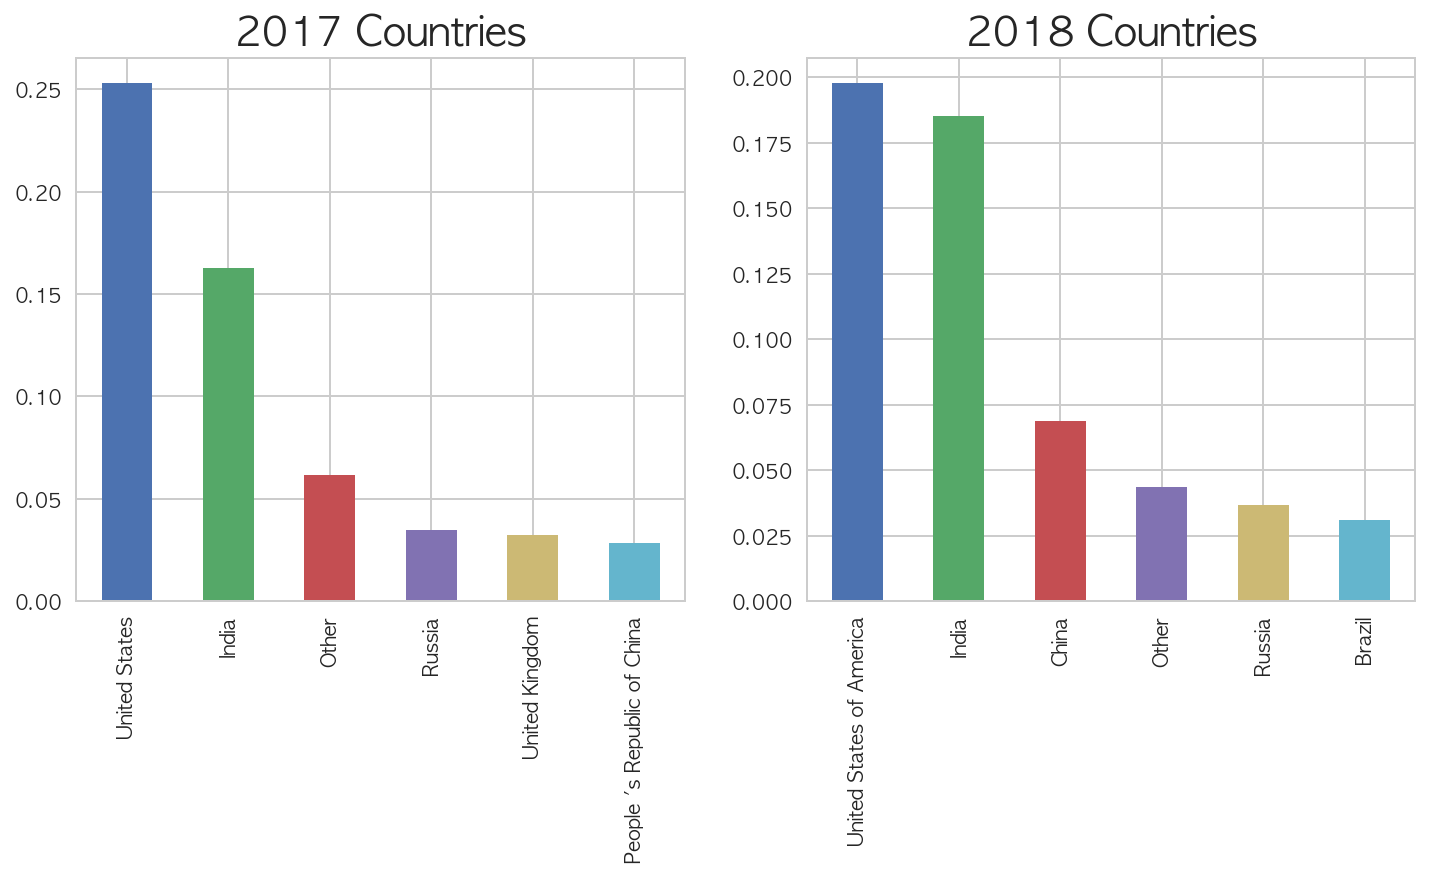

In [285]:
f, ax = plt.subplots(1, 2, figsize=(12, 5))
per_df(tmp_df, tmp_df.columns[1])[:6].plot.bar(ax=ax[0]).set_title('2017 Countries', fontdict=fontdict)
per_df(multi_18, 'Q3')[:6].plot.bar(ax=ax[1]).set_title('2018 Countries', fontdict=fontdict)

Text(0.5,1,'Age')

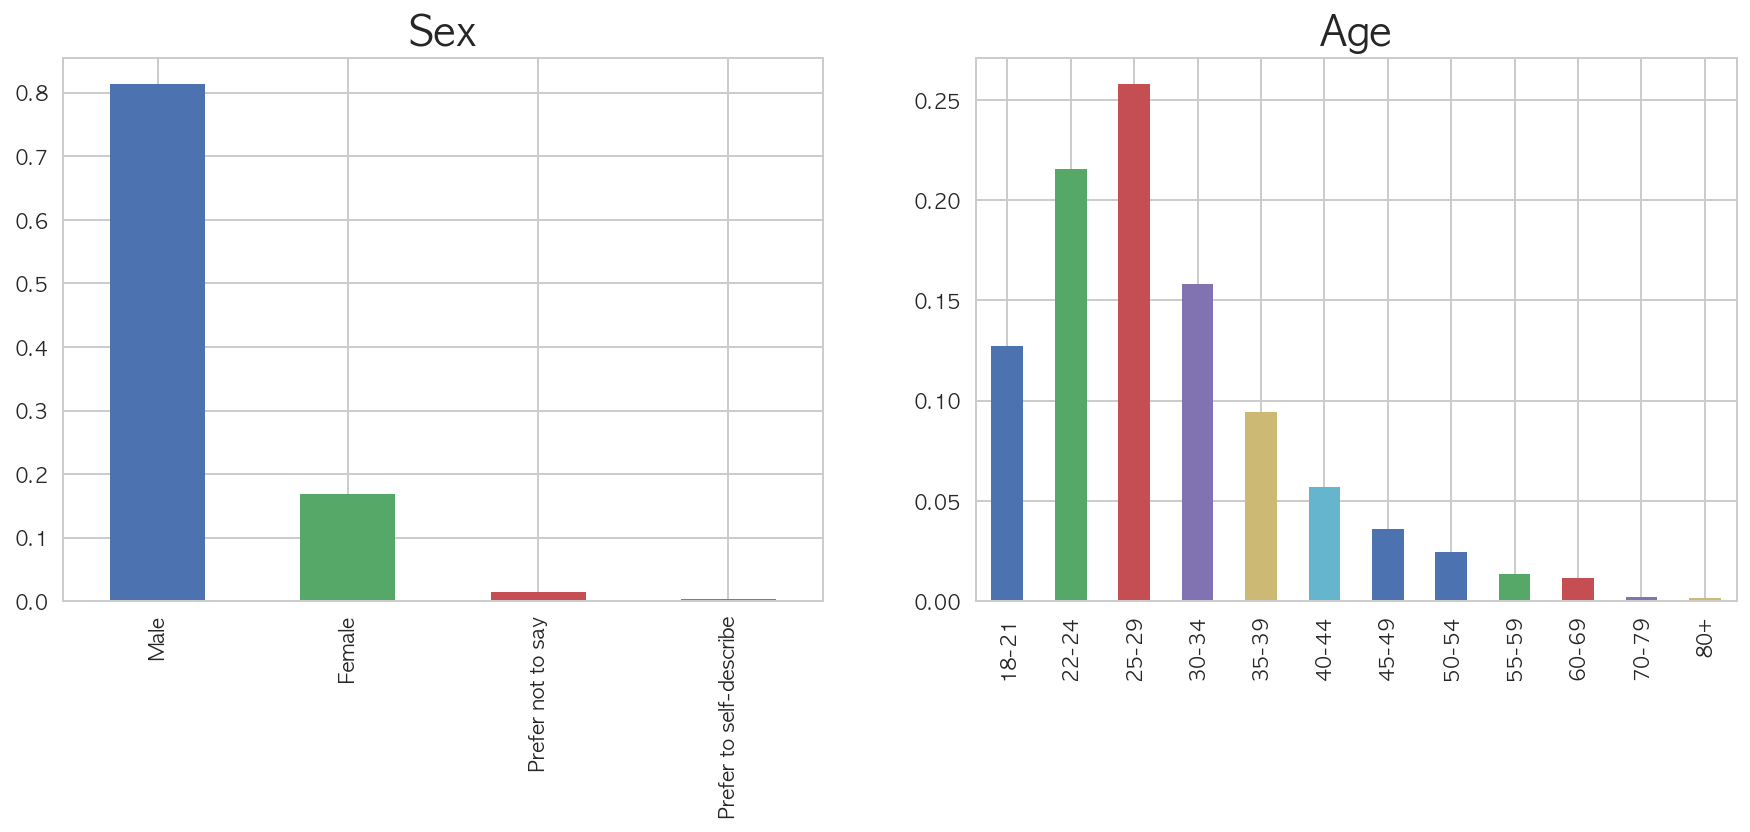

In [259]:
f, ax = plt.subplots(1,2, figsize=(15, 5))
per_df(multi_18, 'Q1').plot.bar(ax=ax[0]).set_title('Sex', fontdict=fontdict)
per_df(multi_18, 'Q2').sort_index().plot.bar(ax=ax[1]).set_title('Age', fontdict=fontdict)

In [247]:
multi_18_f = multi_18[multi_18["Q1"] == "Female"]
multi_18_m = multi_18[multi_18["Q1"] == "Male"]
multi_18_n = multi_18[(multi_18["Q1"] != "Male") & (multi_18["Q1"] != "Female")]

Text(0.5,1,'No gender Age')

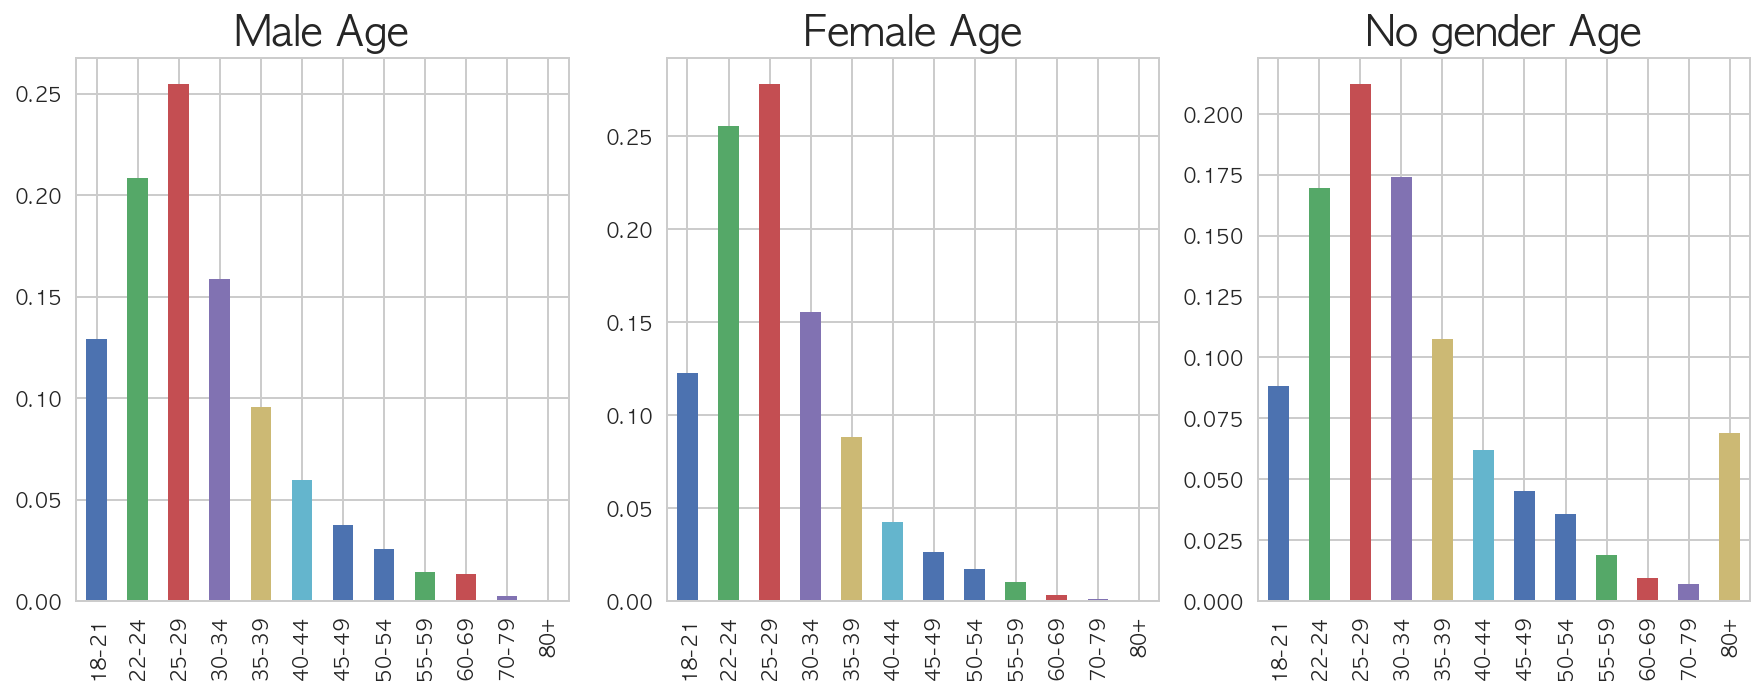

In [260]:
f, ax = plt.subplots(1, 3, figsize=(15, 5))
per_df(multi_18_m, 'Q2').sort_index().plot.bar(ax=ax[0]).set_title('Male Age', fontdict=fontdict)
per_df(multi_18_f, 'Q2').sort_index().plot.bar(ax=ax[1]).set_title('Female Age', fontdict=fontdict)
per_df(multi_18_n, 'Q2').sort_index().plot.bar(ax=ax[2]).set_title('No gender Age', fontdict=fontdict)

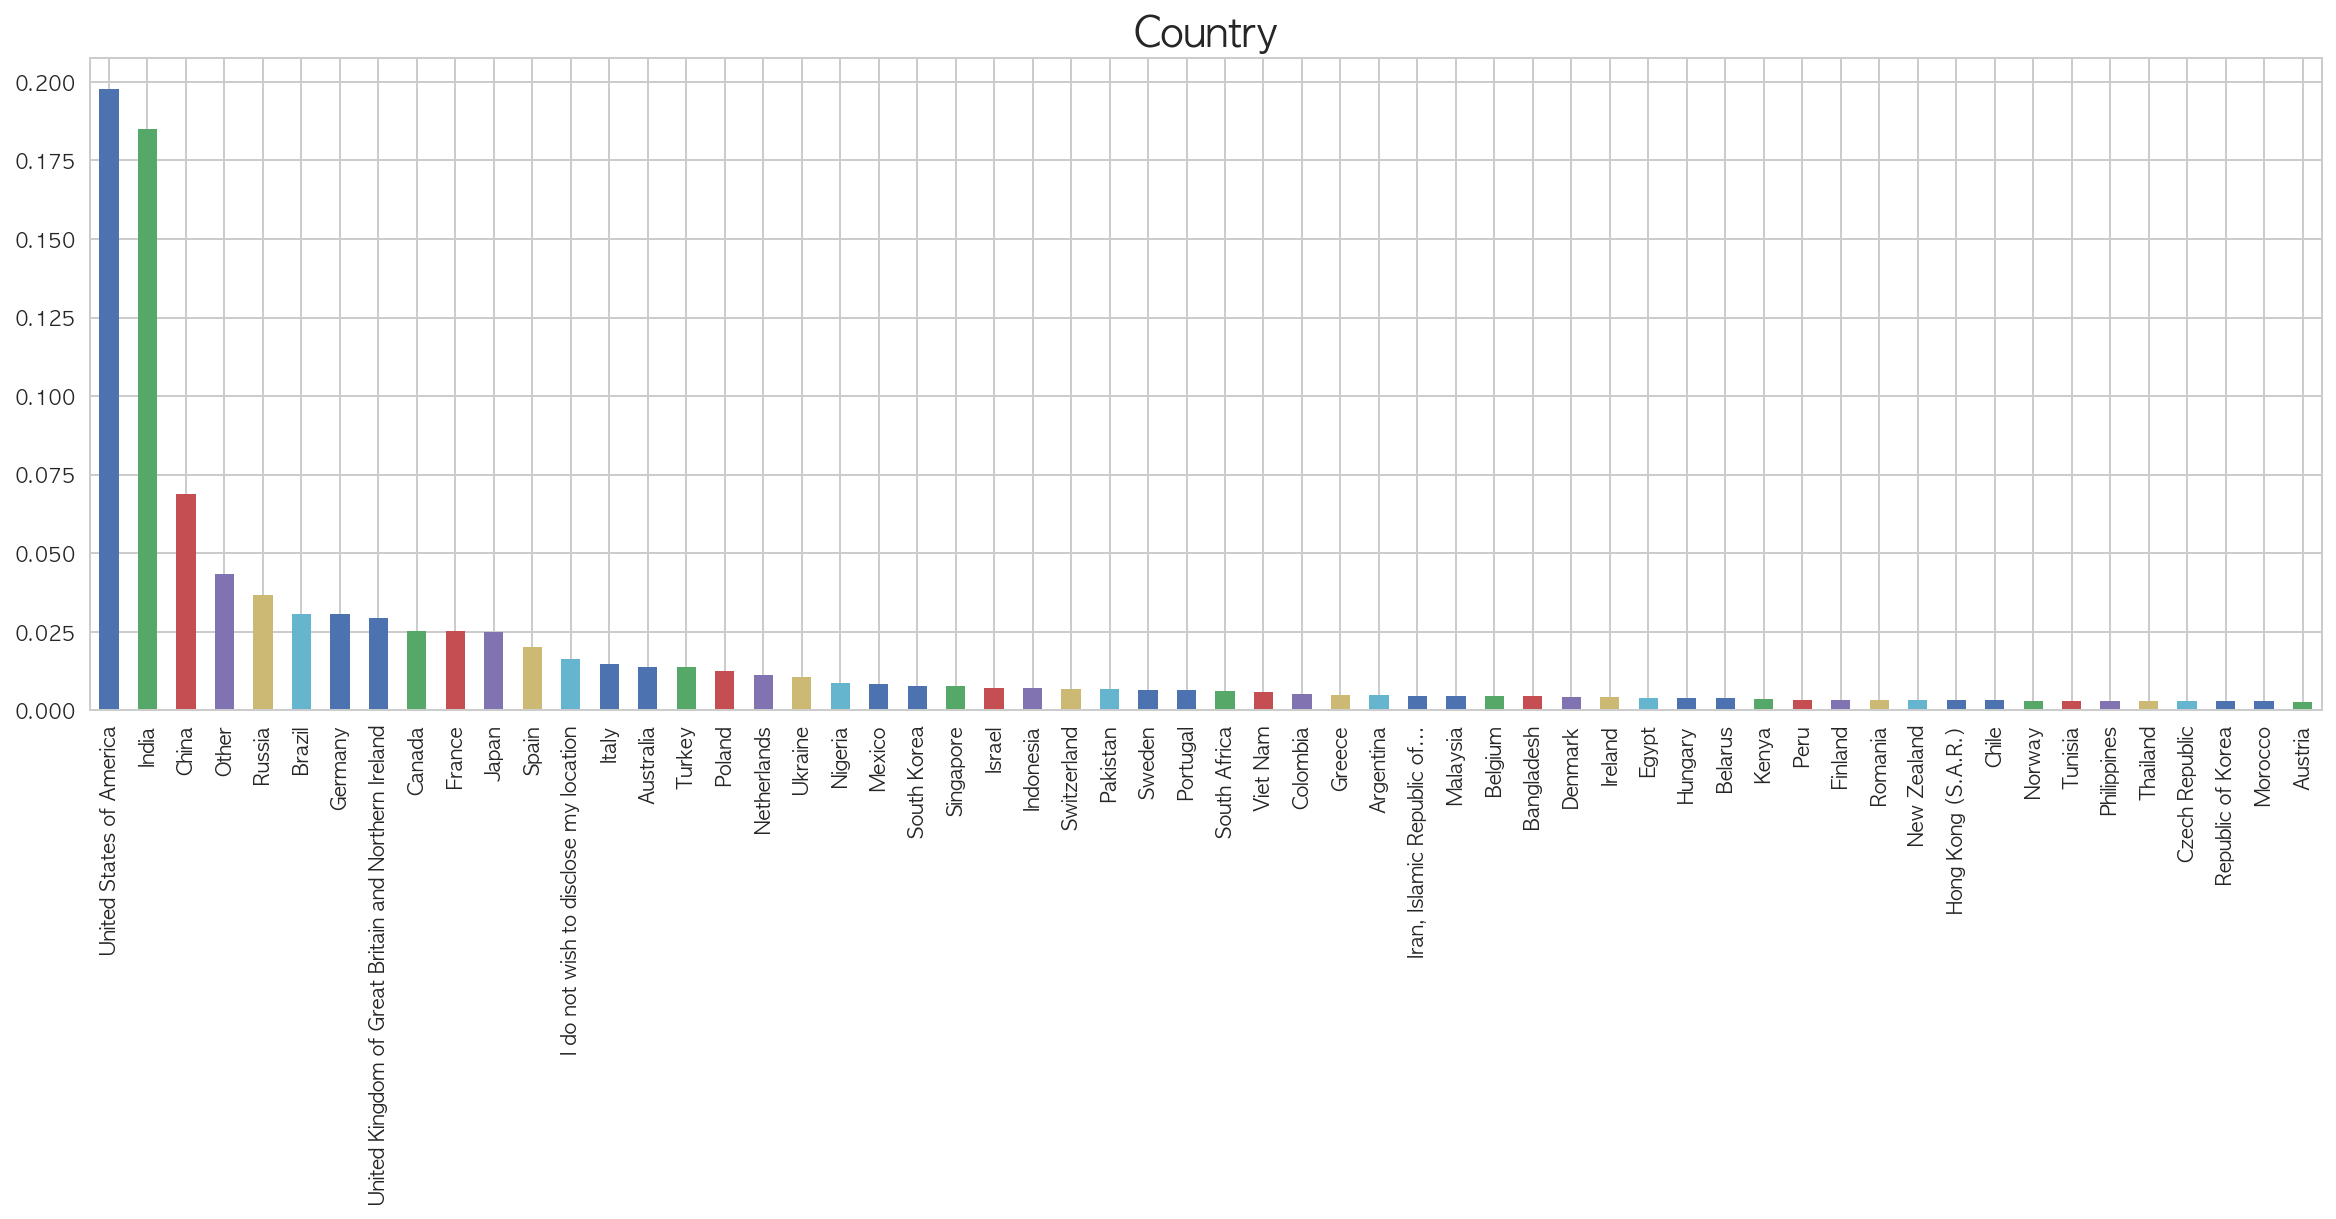

In [233]:
g = per_df(multi_18, 'Q3').plot.bar(figsize=(20,6)).set_title('Country', fontdict=fontdict)

In [345]:
def get_df_i_want(df, col, condition, is_false = False):
    return df[df[col] != condition] if is_false else df[df[col] == condition]

In [350]:
multi_18_US = get_df_i_want(multi_18, "Q3", "United States of America")
multi_18_India = get_df_i_want(multi_18, "Q3", "India")
multi_18_China = get_df_i_want(multi_18, "Q3", "China")

In [369]:
multi_18.Q10.unique().tolist()

['I do not know',
 'No (we do not use ML methods)',
 nan,
 'We are exploring ML methods (and may one day put a model into production)',
 'We recently started using ML methods (i.e., models in production for less than 2 years)',
 'We have well established ML methods (i.e., models in production for more than 2 years)',
 'We use ML methods for generating insights (but do not put working models into production)']

In [382]:
li = [str_ for str_ in multi_18.Q10.unique().tolist() if type(str_) != float]

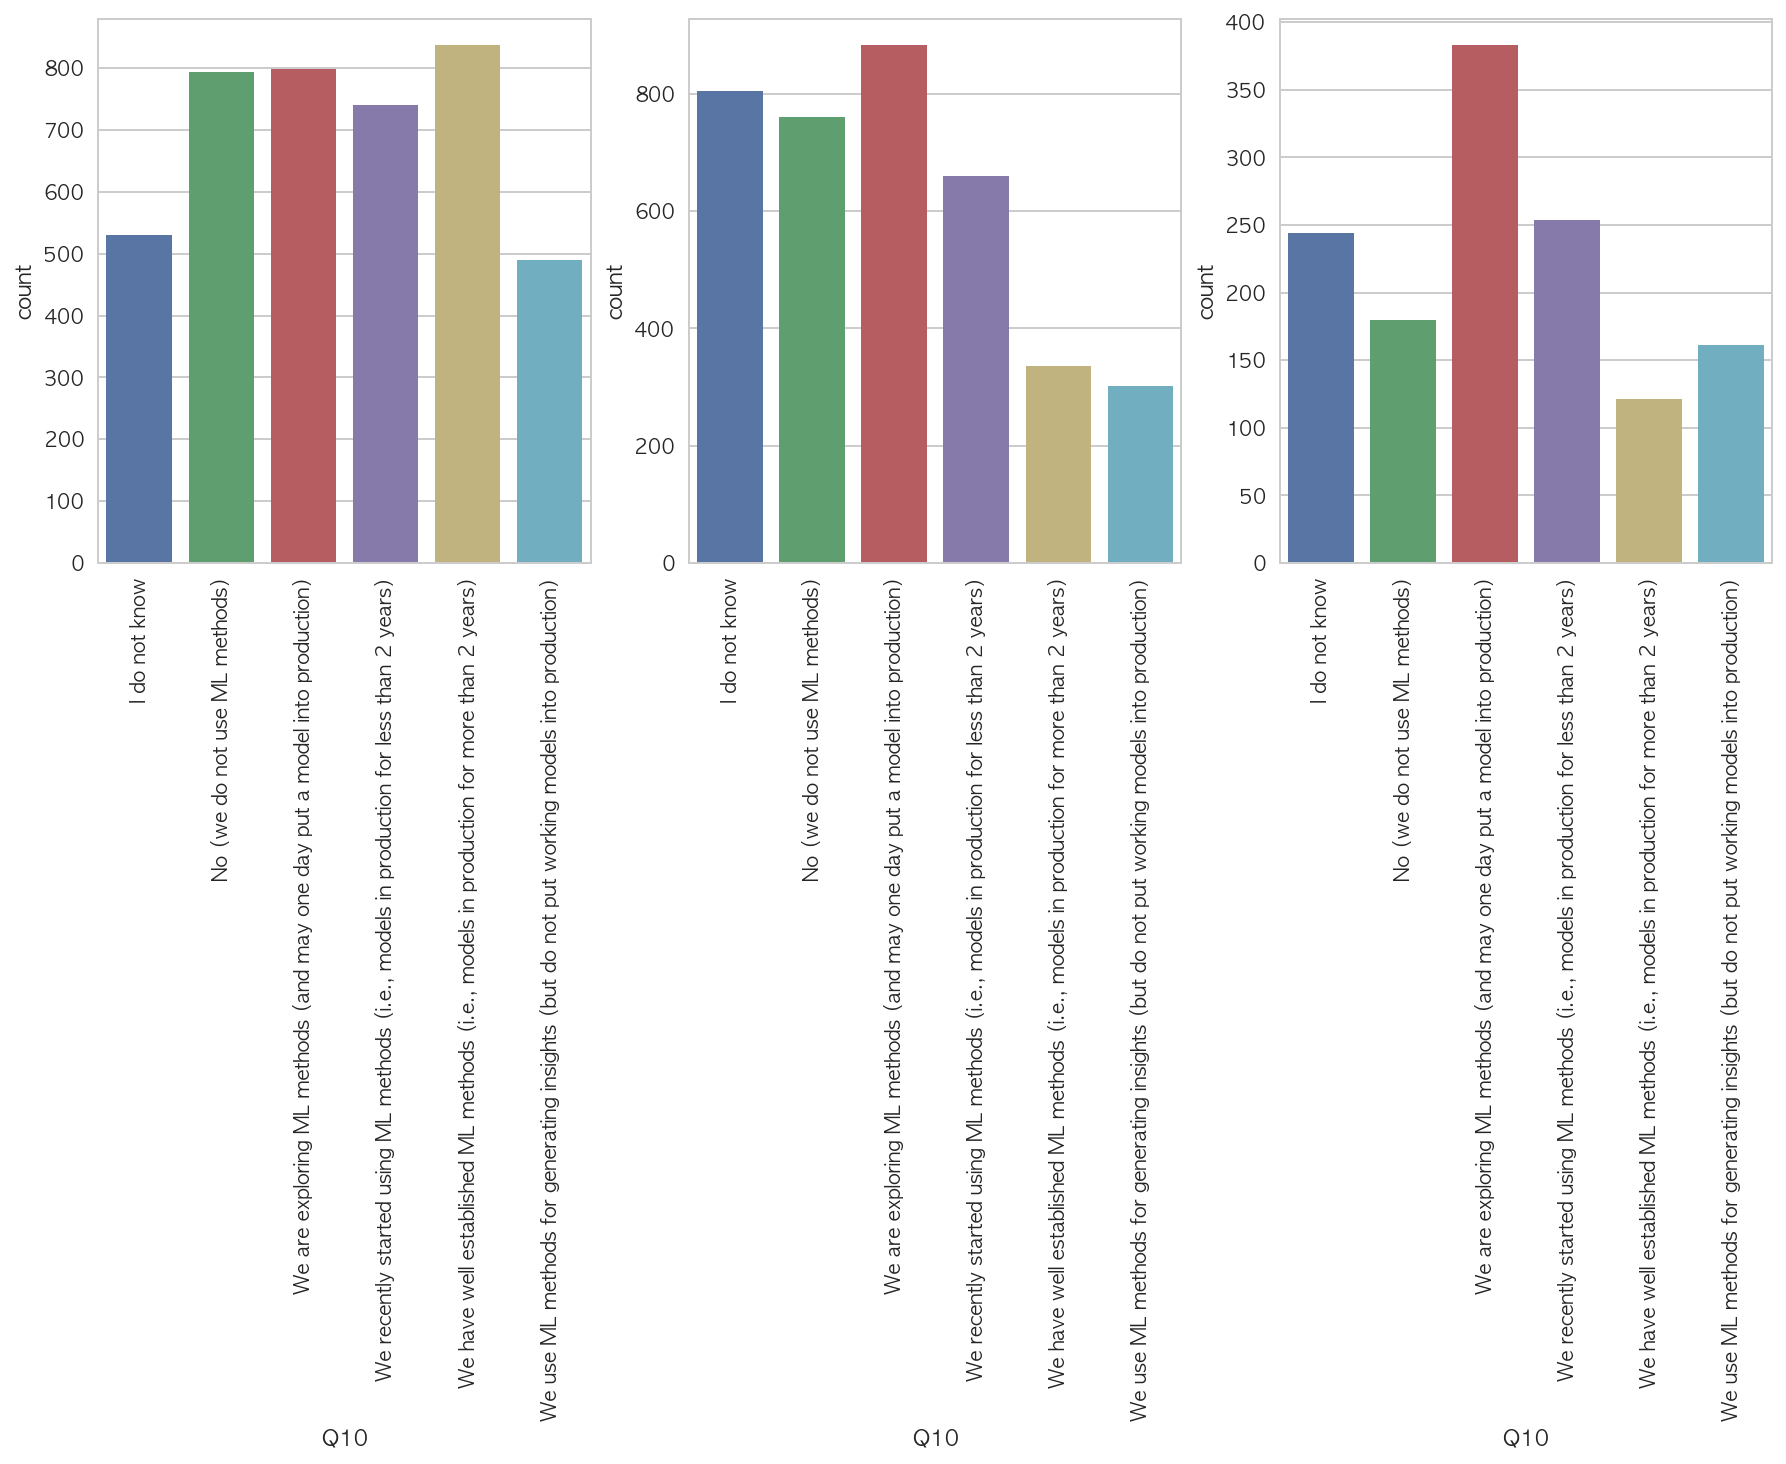

In [384]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.xticks(rotation=90)
sns.countplot(multi_18_US["Q10"].sort_index(), order=li)
plt.subplot(1, 3, 2)
plt.xticks(rotation=90)
sns.countplot(multi_18_India["Q10"].sort_index(), order=li)
plt.subplot(1, 3, 3)
plt.xticks(rotation=90)
sns.countplot(multi_18_China["Q10"].sort_index(), order=li)

plt.show()